In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [29]:
df = pd.read_csv("./customer_churn_dataset-training-master.csv")

In [30]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [31]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [32]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [33]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [34]:
df=df.dropna()

In [35]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [36]:
df=df.drop(columns=['CustomerID','Subscription Type'],axis=1)

In [37]:
x = df.drop('Churn',axis=1)
y=df['Churn']

In [38]:
y.value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [39]:
x_num = x.select_dtypes(exclude='object')
x_cat = x.select_dtypes(include='object')

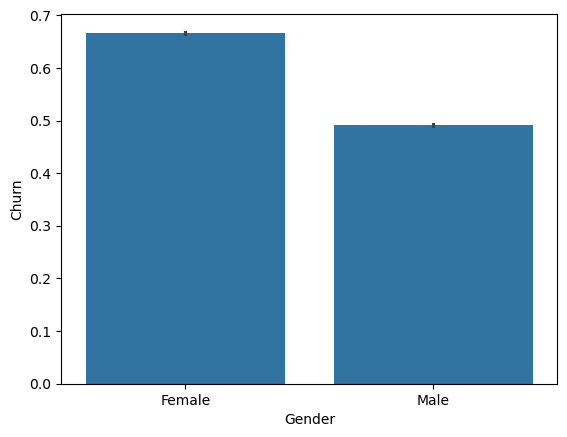

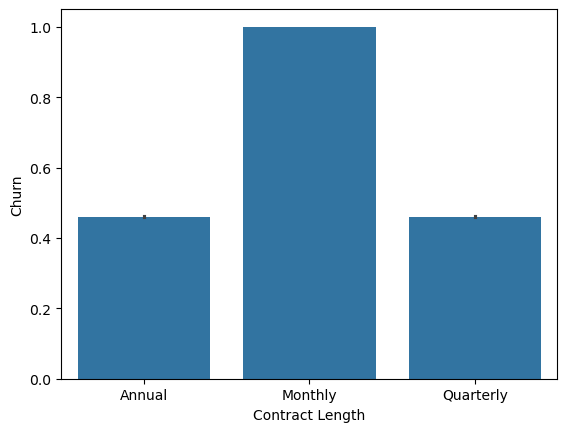

In [40]:
for i in x_cat:
    plt.figure()
    sns.barplot(x=x_cat[i],y=y)
    plt.show()

In [41]:
# x_cat = x_cat.drop('Subscription Type',axis=1)

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


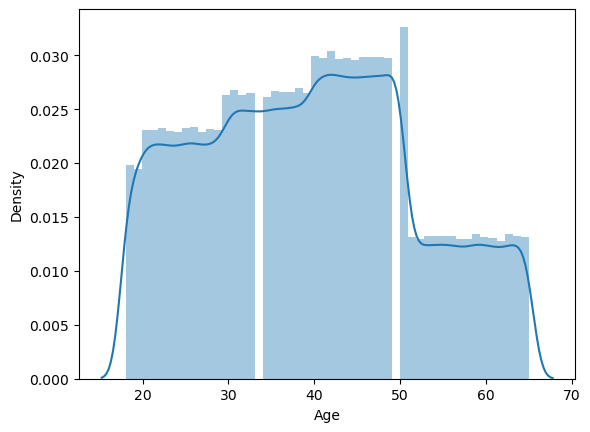

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


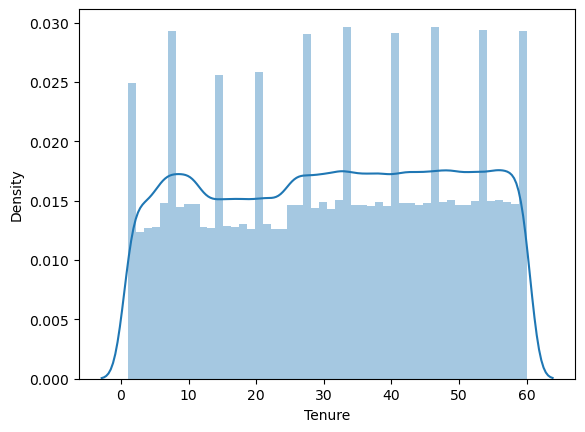

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


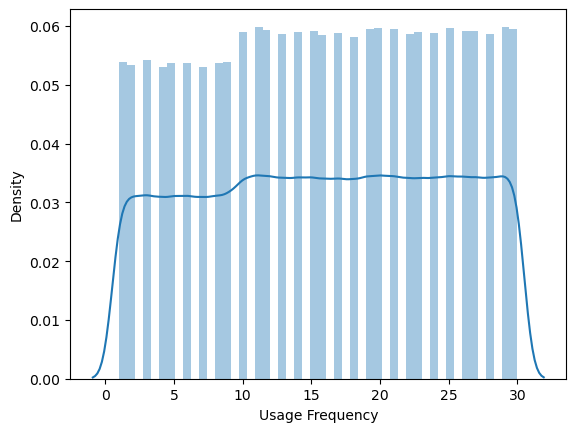

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


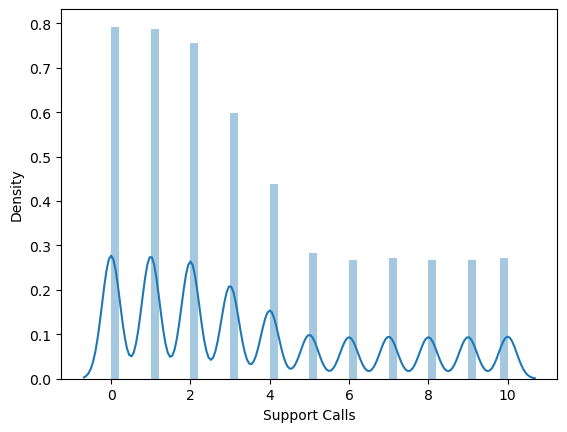

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


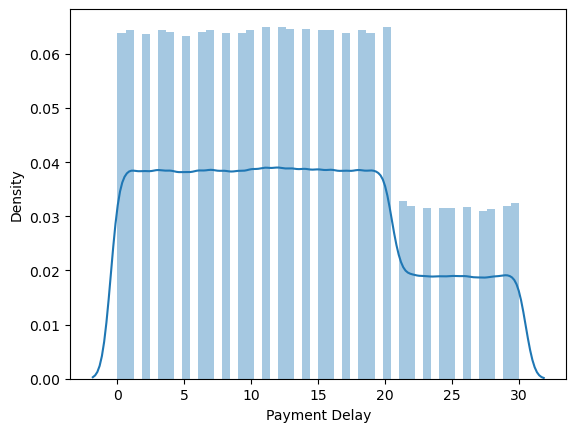

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


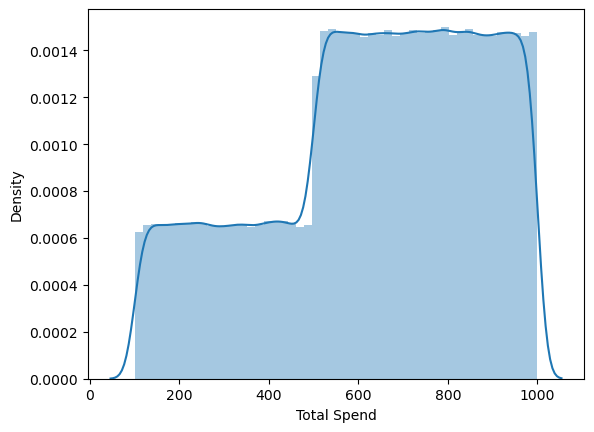

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_7290/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


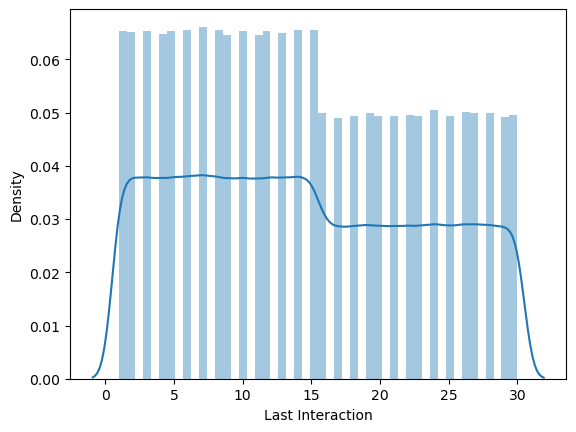

In [42]:
for i in x_num:
    plt.figure()
    sns.distplot(x_num[i])
    plt.show()

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline(steps=[
            ('scaler', MinMaxScaler())
        ]),x_num.columns),
        ('cat',Pipeline(steps=[
            ('encode', OneHotEncoder(handle_unknown='ignore'))
        ]),x_cat.columns)
    ]
)

In [45]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('balance')
    ('classifier', RandomForestClassifier())
])

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
x_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction
321745,24.0,Male,58.0,28.0,0.0,4.0,Annual,665.22,29.0
175119,24.0,Male,26.0,12.0,1.0,26.0,Quarterly,754.00,12.0
272448,18.0,Male,36.0,8.0,0.0,7.0,Quarterly,852.86,9.0
66769,36.0,Female,18.0,9.0,2.0,23.0,Monthly,758.00,3.0
70297,57.0,Female,27.0,26.0,8.0,15.0,Monthly,688.00,10.0
...,...,...,...,...,...,...,...,...,...
259179,41.0,Male,44.0,18.0,2.0,13.0,Annual,717.39,3.0
365839,45.0,Female,44.0,14.0,3.0,13.0,Annual,995.38,8.0
131932,37.0,Female,9.0,4.0,10.0,12.0,Monthly,979.00,8.0
146867,33.0,Male,27.0,5.0,10.0,20.0,Annual,824.00,1.0


In [45]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Contract Length'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [46]:
y_pred=pipeline.predict(x_test)

In [47]:
metrics.accuracy_score(y_test,y_pred)

0.9991606837025191

In [48]:
metrics.confusion_matrix(y_test,y_pred)

array([[38061,     2],
       [   72, 50032]])

In [56]:
x_train.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Contract Length', 'Total Spend', 'Last Interaction'],
      dtype='object')

In [65]:
feature = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Contract Length', 'Total Spend', 'Last Interaction']
data = [30.0,'Female',39.0,14.0,5.0,18.0,'Annual',932.0,17.0]

res = dict(map(lambda i,j : (i,[j]) , feature,data))
print(res)

{'Age': [30.0], 'Gender': ['Female'], 'Tenure': [39.0], 'Usage Frequency': [14.0], 'Support Calls': [5.0], 'Payment Delay': [18.0], 'Contract Length': ['Annual'], 'Total Spend': [932.0], 'Last Interaction': [17.0]}


In [66]:
new = pd.DataFrame(res)

In [67]:
new

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction
0,30.0,Female,39.0,14.0,5.0,18.0,Annual,932.0,17.0


In [68]:
pipeline.predict(new)

array([1.])

In [79]:
import pickle
pickle.dump(pipeline,open('my_model.pkl','wb'))

In [81]:
pipe = pickle.load(open('my_model.pkl','rb'))

In [82]:
pipe.predict(new)

array([1.])

In [16]:
import pickle

In [ ]:
with open('my_model.pkl','rb') as f:
    model = pickle.load(f)

In [19]:
!pip install numpy --upgrade

  Using cached numpy-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl (21.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.16.2 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 2.0.2 which is incompatible.
langchain 0.2.14 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
langchain-community 0.2.12 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.


In [21]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter

# Create an imbalanced dataset



In [22]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=10, n_clusters_per_class=1, 
                           weights=[0.9, 0.1], flip_y=0, random_state=1)

# Check the distribution of classes
print(f"Original dataset shape: {Counter(y)}")




Original dataset shape: Counter({0: 900, 1: 100})


In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the resampled data
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Resampled dataset shape: Counter({1: 624, 0: 624})
